# Plotting a voltage curve from a folder of res files

This example will create a hull and plot a voltage curve from the computed phases found inside this directory.

In [1]:
import matador
from pathlib import Path

from matador.hull import QueryConvexHull
from matador.scrapers.castep_scrapers import res2dict
%matplotlib inline

In [2]:
cursor, failures = res2dict("*.res")

Successfully scraped 6 out of 6 files.


6 structures found within 0.0 eV of the hull, including chemical potentials.
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                Source                 !?!  Pressure  Cell volume      Hull dist.      Space group      Formula      # fu   Prov.  
                                             (GPa)      (Å³/fu)        (meV/atom)    
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
* P-CollCode150873                              0.01         21.2           0.0           Cmca             P          4      ICSD  
* LiP-ColCode23621                             -0.02        173.2           0.0          I41/acd         LiP7         8      ICSD  
* LiP-CollCode60774                             0.02        198.4           0.0          P212121         Li3P7        4      ICSD  
* LiP-CollCode182159                         

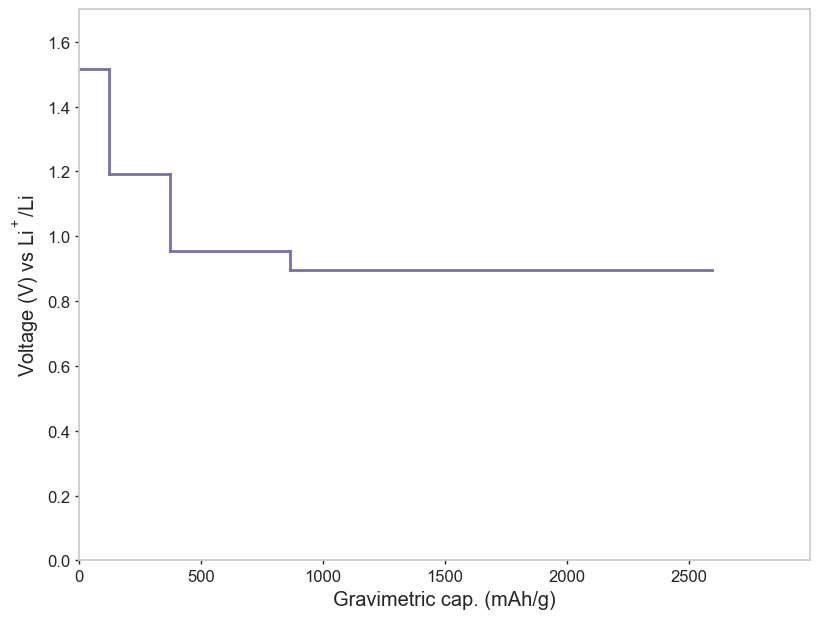

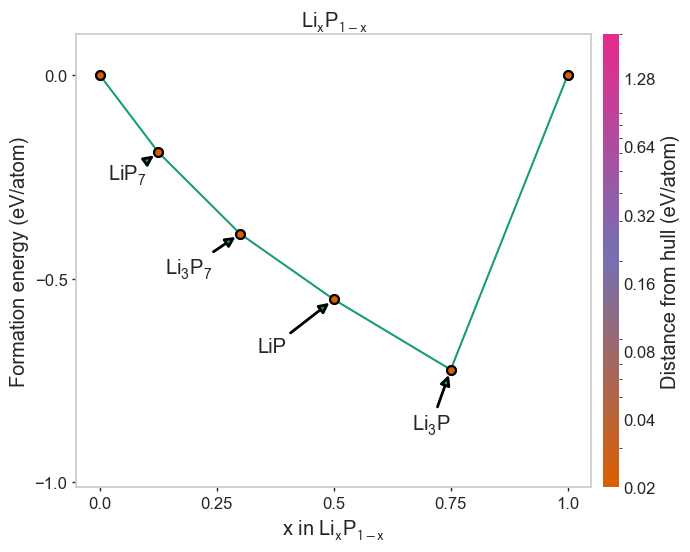

In [3]:
hull = QueryConvexHull(
    cursor=cursor, 
    species=['Li', 'P'], 
    voltage=True, 
    plot_kwargs={"labels": True}
)